# Impact of the source a priori position on the estimated source positions in the VLBI solution
-----

This notebook aims to assess the implication of the source a priori position on the VLBI solutions.

In the VLBI analysis process, the source a priori positions are used to calculate the partial of 
delay and delay rate with respect to the interested parameters.

This investigation will provide information for two topics `crf-on-eop` and `gaiacrf-in-vlbi`.

Several solutions will be included in this notebook.
The VLBI sessions used to generate the solution are common.

The impact is test on solutions under both cases of the Galactic aberration modeling considered or not.

- `icrf2-ga-19` vs. `icrf3-ga-19`

In [1]:
from astropy.table import Table, Column
import astropy.units as u
import bottleneck as bn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## ICRF2 vs. ICRF3 with GA modeling

In [2]:
from my_progs.vlbi.read_sou import read_sou

icrf2ga = read_sou("../data/icrf2-ga-19/icrf2-ga-19.sou")
icrf3ga = read_sou("../data/icrf3-ga-19/icrf3-ga-19.sou")

In [3]:
len(icrf2ga), len(icrf3ga)

(4544, 4544)

In [4]:
from my_progs.catalog.pos_diff import radio_cat_diff_calc

soldif1 = radio_cat_diff_calc(icrf2ga, icrf3ga, sou_name="iers_name")

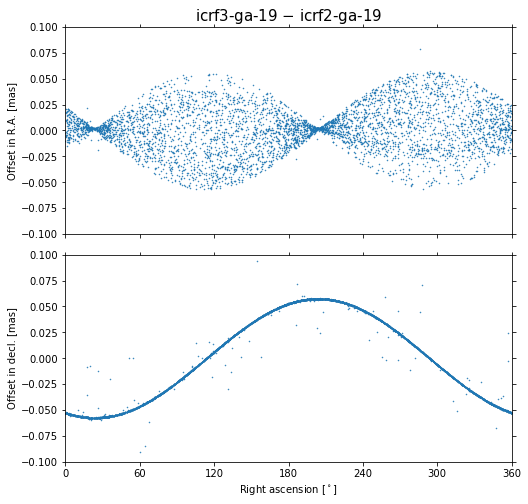

In [14]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(soldif1["ra"], soldif1["dra"], ".", ms=1)
ax1.plot(soldif1["ra"], soldif1["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Right ascension [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(0, 361, 60))

ax0.set_xlim([0, 360])
ax0.set_ylim([-0.1, 0.1])
ax1.set_ylim([-0.1, 0.1])

ax0.set_title("icrf3-ga-19 $-$ icrf2-ga-19", fontsize=15)

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.1)

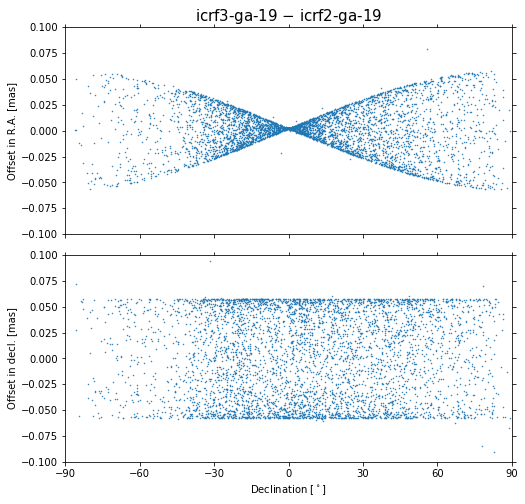

In [13]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(soldif1["dec"], soldif1["dra"], ".", ms=1)
ax1.plot(soldif1["dec"], soldif1["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Declination [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(-90, 91, 30))

ax0.set_xlim([-90, 90])
ax0.set_ylim([-0.1, 0.1])
ax1.set_ylim([-0.1, 0.1])

ax0.set_title("icrf3-ga-19 $-$ icrf2-ga-19", fontsize=15)

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.1)